<a href="https://colab.research.google.com/github/ghostpasha01/Veri_Bilimi_projelerim/blob/main/Siparis%C4%B0ptalAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
orders=pd.read_csv(filepath_or_buffer="C://Users//Hp//Desktop//datasets//data_orders.csv")

In [ ]:
orders.shape 

(10716, 8)

In [ ]:
# random_state argümanı aynı örneği almamızı sağlar
# her seferinde aynı argümanlarla tüm yöntemi
orders.sample(n=10,random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [ ]:
offers=pd.read_csv(filepath_or_buffer="C://Users//Hp//Desktop//datasets//data_offers.csv")

In [ ]:
offers.shape

(334363, 2)

In [ ]:
offers.sample(n=10,random_state=42)

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


# açıklama
Daha sonra, daha kolay manipülasyon için iki DataFramei bir araya getirmek istiyoruz.
Pandalar, tam olarak bunu yapmak için merge() yöntemine sahiptir. SQLde tabloları birleştirmeye benzer. 
Birleştirmenin nasıl (iç) yapılmasını istediğimizi ve hangi sütunda gerçekleşmesi gerektiğini (order_gk) belirtiyoruz.
Ardından, birleştirilmiş DataFramein bir örneğini yazdırırız.

In [ ]:
df=orders.merge(right=offers,how="inner",on="order_gk")

In [ ]:
df.sample(n=10,random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


# açıklama
Veri kalitesini biraz iyileştirmek için bir şeyler yapabiliriz. Örneğin, içindeki order_status_key ve içindeki değerler
is_driver_assigned_key içerik hakkında bilgi vermez, daha çok bazı dahili açıklamalara işaret eden anahtarlardır. 
Değerlerini daha bilgilendirici bilgilerle değiştirebiliriz, örneğin 1syi is_driver_assigned_keystring Yes ve 0syi string
ile değiştirmek gibi No. order_status_key Aynı şey sütun için de yapılabilir . Ayrıca, sütunların adları biraz teknik gelebilir,
ancak bunları değiştirebiliriz.

In [ ]:
import numpy as np

df["is_driver_assigned"]=np.where(df["is_driver_assigned_key"]==1,"Yes","No")
df["order_status"]=np.where(df["order_status_key"]==4,"Client Cancelled","System Reject")
df.drop(columns=["is_driver_assigned_key","order_status_key"],inplace=True)

In [ ]:
df=df.rename(columns={
    "order_datetime":"order_time"
})

In [ ]:
df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled


# Soru 1
Başarısızlık nedenlerine göre bir sipariş dağılımı oluşturun: sürücü atamasından önceki ve sonraki iptaller ve sipariş reddi
nedenleri. Ortaya çıkan grafiği analiz edin. En çok sipariş hangi kategoride?

# AÇIKLAMA
Bu soruyu çözmek için basit bir çözüm, DataFramei ve sütunlarına göre gruplandırmak için groupby yöntemini kullanmakve ardından
her gruptaki satırları, yani gruplandırma sütunları için her bir değer kombinasyonunu saymaktır.is_driver_assignedorder_status 
Her ikisi de ikili değişkenler olduğundan (yalnızca iki olası değere sahip olduğundan), dört olası kombinasyon vardır.
Aşağıdaki hücre, önerilen yaklaşımın çıktısını yazdırır.Şoför atanmadan önce çok sayıda siparişin iptal edildiğini görüyoruz, 
bu da müşterilerin ulaşım ihtiyaçları için çok uzun süre beklediklerini ve bir alternatife karar verdiklerini gösteriyor.
13435 Müşteri tarafından iptal edilen 9469 ve sistem tarafından reddedilen siparişlerimiz var . 8360 Bir sürücü atandıktan sonra
müşteri iptalleri vardır ve bunlardan yalnızca dördü bir nedenden dolayı sistem tarafından reddedilmiştir.

In [ ]:
df.groupby(by=["is_driver_assigned","order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

# Bu soruya bir başka ilginç yaklaşım da pivot tabloları kullanmaktır

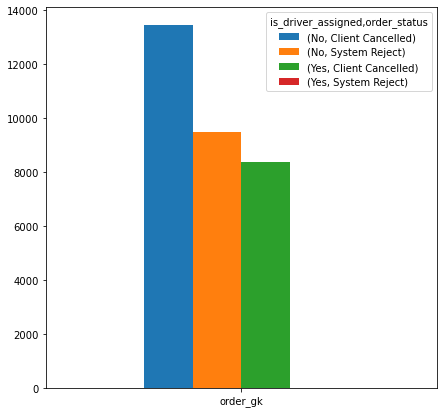

In [ ]:
df_q1=df.pivot_table(columns=["is_driver_assigned","order_status"],values="order_gk",aggfunc="count")
_=df_q1.plot(kind="bar",subplots=False,figsize=(7,7),legend=True,rot=0)

In [ ]:
# pivot tablonun yapısı, gruplandırma veri çerçevesine çok benzer 
df_q1

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

# soru 2
Başarısız siparişlerin dağılımını saatlere göre çizin. Belirli saatlerin bir kategoride anormal derecede yüksek bir orana sahip
olduğu yönünde bir eğilim var mı? En büyük başarısızlıklar hangi saatler? Bu nasıl açıklanabilir?

# açıklama
Bu soru, başarısız siparişlerin analizine daha derinlemesine girerek bir öncekinin üzerine insa edilmiştir. Başarısızlıkların
kategoriye göre dağılımını (iptal nedeni ve sürücü ataması) çizmek yerine, bu başarısızlıkların ne zaman meydana geldiğini
ve gün içinde bir kategorinin diğerlerine üstün geldiği belirli bir dönem olup olmadığını bilmek istiyoruz.



In [ ]:
#saat sütunundan saati çıkar
df["order_hour"]=df["order_time"].str.split(":").apply(lambda split: split[0])

In [ ]:
#dönüşümün doğru olduğundan emin olmak için küçük bir örnek yazdırıyoruz.
df.sample(n=5,random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21


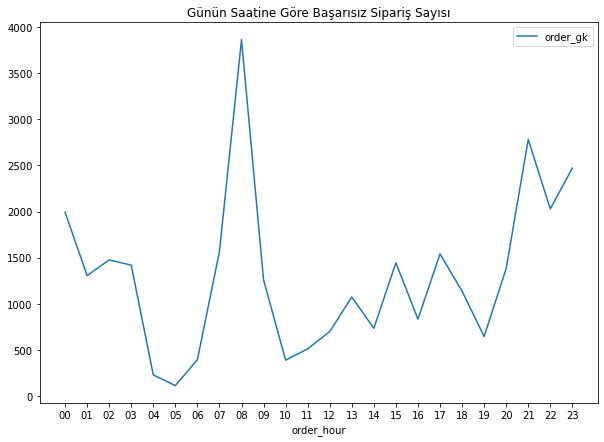

In [ ]:
_=df.groupby(by="order_hour")["order_gk"].count().plot(figsize=(10,7),
                                                      legend=True,
                                                      xticks=range(0,24),
                                                      title="Günün Saatine Göre Başarısız Sipariş Sayısı")

# açıklama
Bu tür toplu bilgileri içeren bir DataFrame doğru ilk adım olarak, sipariş saatine, sürücü tarafından atanan bayrağa ve 
sipariş durumuna göre gruplandırıyoruz ve ardından sayısını sayıyoruz order_gk.

In [ ]:
grouped_q2=df.groupby(by=["order_hour","is_driver_assigned","order_status"])["order_gk"].count()
grouped_q2

order_hour  is_driver_assigned  order_status    
00          No                  Client Cancelled     957
                                System Reject        706
            Yes                 Client Cancelled     326
                                System Reject          4
01          No                  Client Cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client Cancelled     415
23          No                  Client Cancelled    1144
                                System Reject        883
            Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

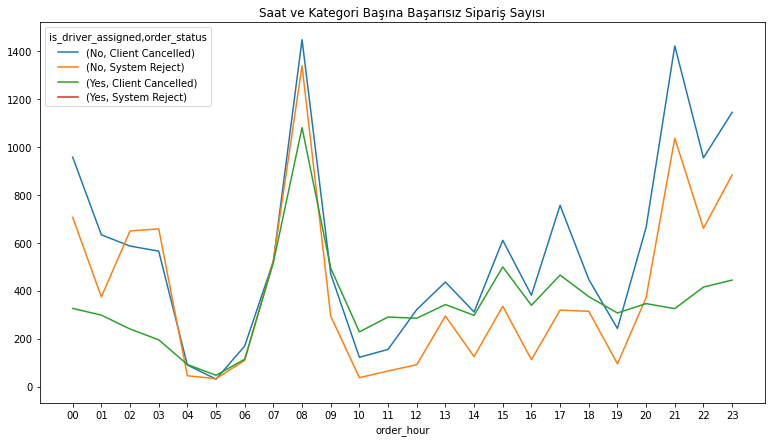

In [ ]:
_ = grouped_q2.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Saat ve Kategori Başına Başarısız Sipariş Sayısı")


# açıklama
Dört sistem reddi, atanan sürücü ile gece yarısı civarında meydana geldi (gruplandırılmış DataFramein çıktısına bakın).
Kategorilerin geri kalanı, gece saatlerinde önemli ölçüde daha düşük bir sayıya sahip atanan sürücü ile müşteri iptalleri
ile benzer bir dağılım izler.



# Soru 3
Sürücülü ve sürücüsüz iptal için ortalama süreyi saat bazında çizin. Bu kurgudan herhangi bir sonuç çıkarabilir miyiz?

# açıklama
Bu soruyu çözmek için önceki soruyla aynı yaklaşımı izleyeceğiz.
İlk olarak, DataFramei sipariş saatine ve sürücü atama bayrağına göre toplayacağız. Ardından,
sütunu ortalama cancellations_time_in_seconds işleviyle toplayacağız . Bu bize gerekli, toplu bilgileri verecektir.

In [ ]:
group_q3=df.groupby(by=["order_hour","is_driver_assigned"])["cancellations_time_in_seconds"].mean()
group_q3

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

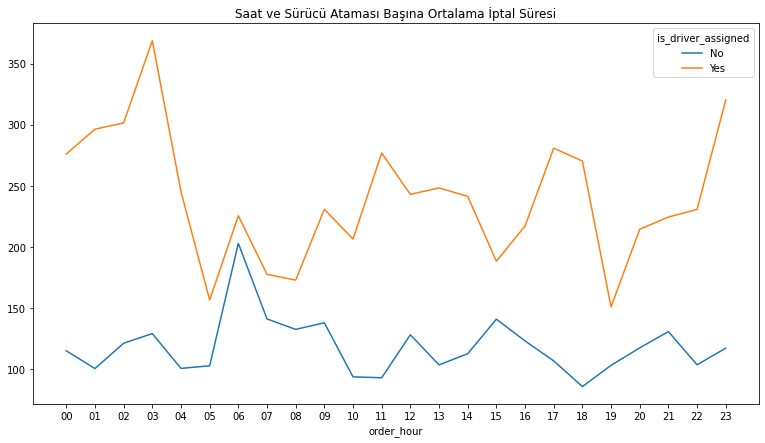

In [ ]:
_ = group_q3.reset_index().pivot(index="order_hour",
                                   columns="is_driver_assigned",
                                   values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                                figsize=(13, 7),
                                                                                title="Saat ve Sürücü Ataması Başına Ortalama İptal Süresi")

# açıklama
Atanmış bir sürücüye sahip siparişlerde, istisnasız her saat için ortalama iptal süresi, sürücüsüz siparişlere göre daha yüksektir. Zirve saat 3te gerçekleşir. Şu anda çok sayıda müşteri iptali var, 
bu nedenle mantıklı bir açıklama, müşterilerin sürücü için çok uzun süre beklemesi olabilir.

# 4. soru
Ortalama ETA'nın dağılımını saatlere göre çizin. Bu arsa nasıl açıklanabilir?

# açıklama
Bu sorunun çözümü oldukça basittir. Sipariş saatinde DataFrame göre gruplandırıyoruz ve m_order_etasütunu ortalama bir
fonksiyonla topluyoruz. Ardından, elde edilen DataFramei çiziyoruz. Sonuç hemen aşağıdaki hücrededir. Satır, saat başına
başarısız siparişlerin sayısıyla çok yakından eşleşir; bu , müşterinin ortalama bekleme süresi arttıkça başarısız siparişlerin 
sayısının arttığını gösterir .

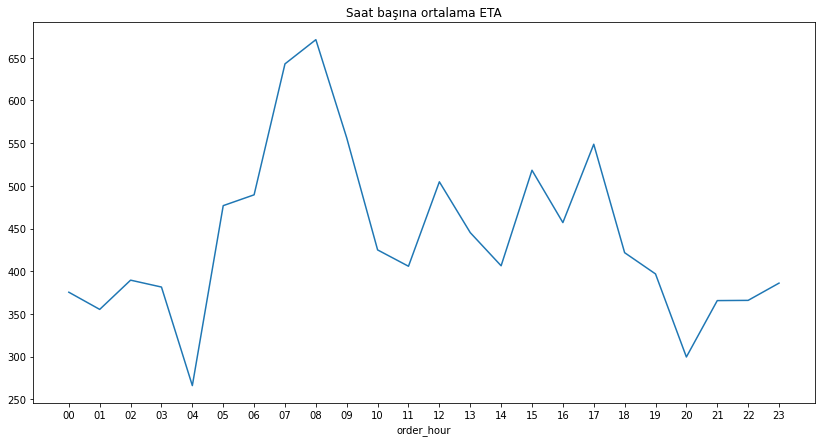

In [ ]:
_ = df.groupby(by="order_hour")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Saat başına ortalama ETA")

# BONUS: Soru 5
h3 ve folium paketlerini kullanarak , orijinal veri kümelerinden tüm siparişlerin %80ini içeren kaç tane boyut 8 hexi hesaplayın
ve hexleri haritadaki başarısızlık sayısına göre renklendirerek görselleştirin.

In [ ]:
import h3
import folium

In [ ]:
df["hex_id"] = df.apply(
    func=lambda row: h3.geo_to_h3(lat=row["origin_latitude"], lng=row["origin_longitude"], resolution=8), axis=1)

In [ ]:
grouped_q5 = df.groupby(by="hex_id")["order_gk"].count()
grouped_q5.shape

In [ ]:
grouped_q5 = grouped_q5.reset_index()
grouped_q5.sample(n=5, random_state=42)

# açıklama
Siparişlerin %80ini içeren hex sayısını bulmak için DataFramedeki order_gk sayım sütunu üzerinde kümülatif bir yüzde işlemi
uygulayacağız. grouped_q5 Bu, aşağıdaki adımlardan oluşur:

1-DataFramei sayıya göre sıralayın.
2-Başarısız siparişlerin toplam sayısını (toplamını) bulun.
3-Sipariş sayısı sütununun kümülatif toplamını bulmak için cumsum yöntemini uygulayın .
4-Yüzdeleri oluşturmak için toplam toplama bölün.
5-%80e en yakın satırı bulmak için filtreleyin.

In [ ]:
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1
total_orders = grouped_q5["order_gk"].sum()  # 2
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4
grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

# açıklama
Nihai çıktıda 137 satır ve orijinal gruplandırılmış DataFramede 139 satır vardır, yani 137 altıgen verinin yaklaşık
%80ini içerir ve yalnızca 2 altıgen diğer %20yi içerir!

In [ ]:
map = folium.Map(location=[df["origin_latitude"].mean(), df["origin_longitude"].mean()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="cartodbpositron")

In [ ]:
import json
import geojson


def to_geojson(row):
    """Transform hex_id into a geojson object."""
    geometry = {
        "type": "Polygon",
        "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"], geo_json=True)]
    }
    return geojson.Feature(id=row["hex_id"], geometry=geometry, properties={"order_gk": row["order_gk"]})


geojsons = grouped_q5.apply(func=to_geojson, axis=1).values.tolist()
geojson_str: str = json.dumps(geojson.FeatureCollection(geojsons))

In [ ]:
import matplotlib

# instantiate a colormap object for better visualisation
colormap = matplotlib.cm.get_cmap(name="plasma")
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

In [ ]:
_ = folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_gk"] - min_order_gk) / (max_order_gk - min_order_gk))),
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [ ]:
map
